In [1]:
#Capstone Two: modeling
#Created on October 20, 2022

In [2]:
#Import necessary packages
import pandas as pd
pd.options.display.max_columns=10000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
allresults = []

In [4]:
#Import and view train data set using read_csv
df = pd.read_csv('../data/clean_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [5]:
#use pd.get_dummies on data frame to create unique columns for each categorical result
df = pd.get_dummies(df)

In [6]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [7]:
df.shape

(1459, 401)

In [8]:
#Look at the data summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [9]:
#Import LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [11]:
print(LinearRegression.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

        .. deprecated:: 1.0
           `normalize` was deprecate

In [12]:
LinearRegression?

In [13]:
LinearRegression??

In [14]:
LinearRegression()

LinearRegression()

In [15]:
featurenames = []

In [16]:
featurename = 'LotArea'
df[featurename] = df['LotArea']

In [17]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,[LotArea],LinearRegression


Text(0, 0.5, 'Actual price')

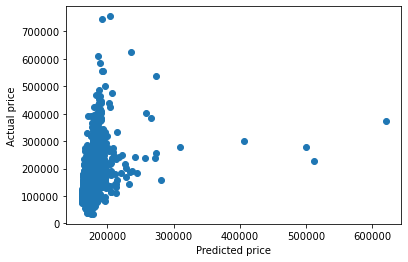

In [18]:
#Plot the predicted Sale Price with actual sale prices
plt.scatter(y_pred, df['SalePrice'])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

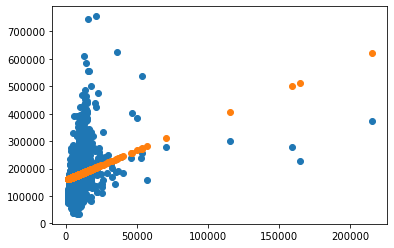

In [19]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['LotArea'], df['SalePrice'])
plt.scatter(df['LotArea'], y_pred) 

Text(0, 0.5, 'Error')

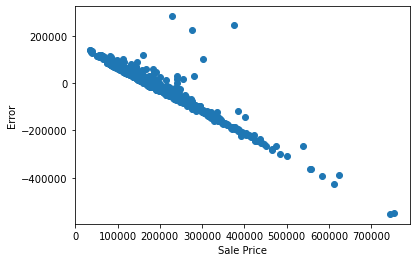

In [20]:
#Plot the Sale price against the error
plt.scatter(df['SalePrice'], e)
plt.xlabel('Sale Price')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

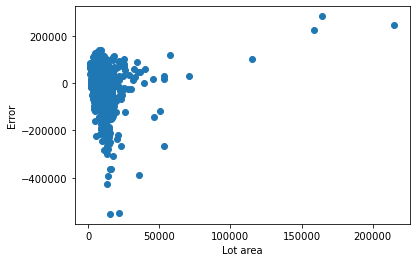

In [21]:
#Plot the Lot Area against the error and label axes
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')
#Larger homes are underestimated on Sale price

In [22]:
df['LotArea_squared'] = df['LotArea'] ** 2

In [23]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [24]:
featurename = 'LotArea_squared'
df[featurename] = df['LotArea_squared']

In [25]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared]",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared]",LinearRegression


Text(0, 0.5, 'Error')

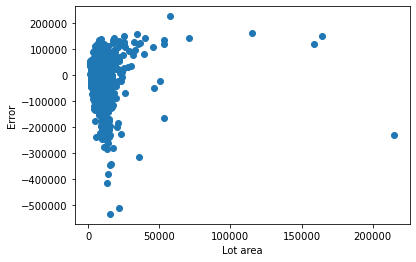

In [26]:
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

In [27]:
featurename = 'LotArea_lt_50000'
df[featurename] = df['LotArea'] < 50000

In [28]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000]",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000]",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000]",LinearRegression


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

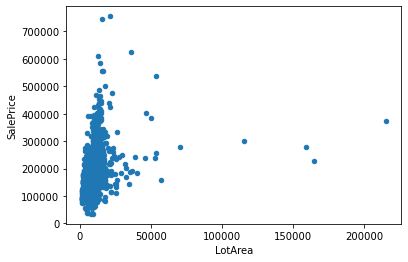

In [29]:
#Plot LotArea and Sale Price
df.plot(kind='scatter', x='LotArea', y='SalePrice')

In [30]:
featurename = 'LotFrontage'
df[featurename] = df['LotFrontage']

In [31]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression


Text(0, 0.5, 'Error')

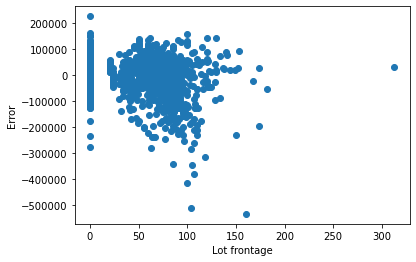

In [32]:
plt.scatter(df['LotFrontage'], e) #residual
plt.xlabel('Lot frontage')
plt.ylabel('Error')

In [33]:
featurename = 'LotFrontage_gt_30'
df[featurename] = df['LotFrontage'] > 30

In [34]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression


In [35]:
featurename = 'LotFrontage_lt_100'
df[featurename] = df['LotFrontage'] < 100

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier


In [38]:
featurename = 'Gravel'
df[featurename] = df['Street_Grvl']

In [39]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
6,22479.878148,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier


In [40]:
featurename = 'TotalBsmtSF'
df[featurename] = df['TotalBsmtSF']

In [41]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
6,22479.878148,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
7,57836.318745,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression


In [42]:
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
6,22479.878148,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
7,57836.318745,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
8,1744.562071,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier


In [43]:
featurename = '1stFlrSF'
df[featurename] = df['1stFlrSF']

In [44]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
6,22479.878148,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
7,57836.318745,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
8,1744.562071,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
9,57034.543548,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression


In [45]:
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,featurenames,model
0,76546.713815,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
1,73569.131484,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
2,73139.716444,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
3,72169.128354,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
4,71558.776899,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
5,20478.886743,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
6,22479.878148,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
7,57836.318745,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
8,1744.562071,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",RandomForestClassifier
9,57034.543548,"[LotArea, LotArea_squared, LotArea_lt_50000, L...",LinearRegression
